In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import logging

import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from batchglm.api.models.nb_glm import Simulator
import diffxpy.api as de

In [3]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

# Generate some data:

In [4]:
sim = Simulator(num_observations=100, num_features=100)
sim.generate_sample_description(num_batches=0, num_conditions=0)
sim.generate()

In [5]:
random_sample_description = pd.DataFrame({
    "pseudotime": np.random.random(size=sim.num_observations),
    "batch": np.random.randint(2, size=sim.num_observations)
})

In [6]:
random_sample_description.iloc[:3,:]

,pseudotime,batch
0,0.739104,0
1,0.580710,0
2,0.600593,0


Add batch effect:

In [7]:
X = sim.X
X[random_sample_description['batch']==0,:] = X[random_sample_description['batch']==0,:]*2

# Run differential expression test

In [8]:
test = de.test.continuous_1d(
    data=X,
    continuous="pseudotime",
    df=3,
    formula_loc="~ 1 + pseudotime + batch",
    formula_scale="~ 1",
    factor_loc_totest="pseudotime",
    test="wald",
    sample_description=random_sample_description,
    quick_scale=True,
    batch_size=None,
    dtype="float64"
)

Fitting model...
INFO:batchglm.train.tf.nb_glm.estimator:Using standard initialization for mean
Using standard initialization for mean
INFO:batchglm.train.tf.nb_glm.estimator:Should train mu: True
Should train mu: True
INFO:batchglm.train.tf.nb_glm.estimator:Using standard initialization for dispersion
Using standard initialization for dispersion
INFO:batchglm.train.tf.nb_glm.estimator:Should train r: False
Should train r: False


/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


INFO:batchglm.train.tf.nb_glm.estimator:training strategy:
[{'convergence_criteria': 't_test',
  'learning_rate': 0.5,
  'loss_window_size': 20,
  'optim_algo': 'ADAM',
  'stopping_criteria': 0.05,
  'use_batching': True},
 {'convergence_criteria': 't_test',
  'learning_rate': 0.5,
  'loss_window_size': 20,
  'optim_algo': 'ADAM',
  'stopping_criteria': 0.05,
  'use_batching': False},
 {'convergence_criteria': 'scaled_moving_average',
  'loss_window_size': 4,
  'optim_algo': 'newton',
  'stopping_criteria': 1e-08,
  'use_batching': False}]
training strategy:
[{'convergence_criteria': 't_test',
  'learning_rate': 0.5,
  'loss_window_size': 20,
  'optim_algo': 'ADAM',
  'stopping_criteria': 0.05,
  'use_batching': True},
 {'convergence_criteria': 't_test',
  'learning_rate': 0.5,
  'loss_window_size': 20,
  'optim_algo': 'ADAM',
  'stopping_criteria': 0.05,
  'use_batching': False},
 {'convergence_criteria': 'scaled_moving_average',
  'loss_window_size': 4,
  'optim_algo': 'newton',
  's

# Obtain the results

In [9]:
test.summary()

,gene,pval,qval,log2fc,mean,grad,ll
0,0,2.858273e-01,3.618067e-01,11.682943,12483.26,2.128969e-07,-1025.002018
1,1,0.000000e+00,0.000000e+00,12.000309,3459.89,2.276272e-07,-882.317483
2,2,3.478570e-04,9.154133e-04,9.930372,1310.37,2.197358e-07,-797.745644
3,3,0.000000e+00,0.000000e+00,10.603560,2651.43,1.229156e-07,-817.151871
4,4,1.248324e-02,2.447694e-02,11.443422,9305.01,1.206732e-07,-944.745356
5,5,3.820294e-10,1.736497e-09,11.917099,7281.53,1.667508e-07,-932.490536
6,6,1.616358e-03,3.758973e-03,13.339872,12397.41,2.200136e-07,-1025.172243
7,7,1.370015e-13,7.611196e-13,10.944947,3179.23,2.278378e-07,-876.852370
8,8,0.000000e+00,0.000000e+00,13.470291,5276.76,2.072956e-07,-937.003583
9,9,5.022157e-02,8.370262e-02,11.549908,8354.51,8.351423e-08,-922.462322


Plot fits by gene:

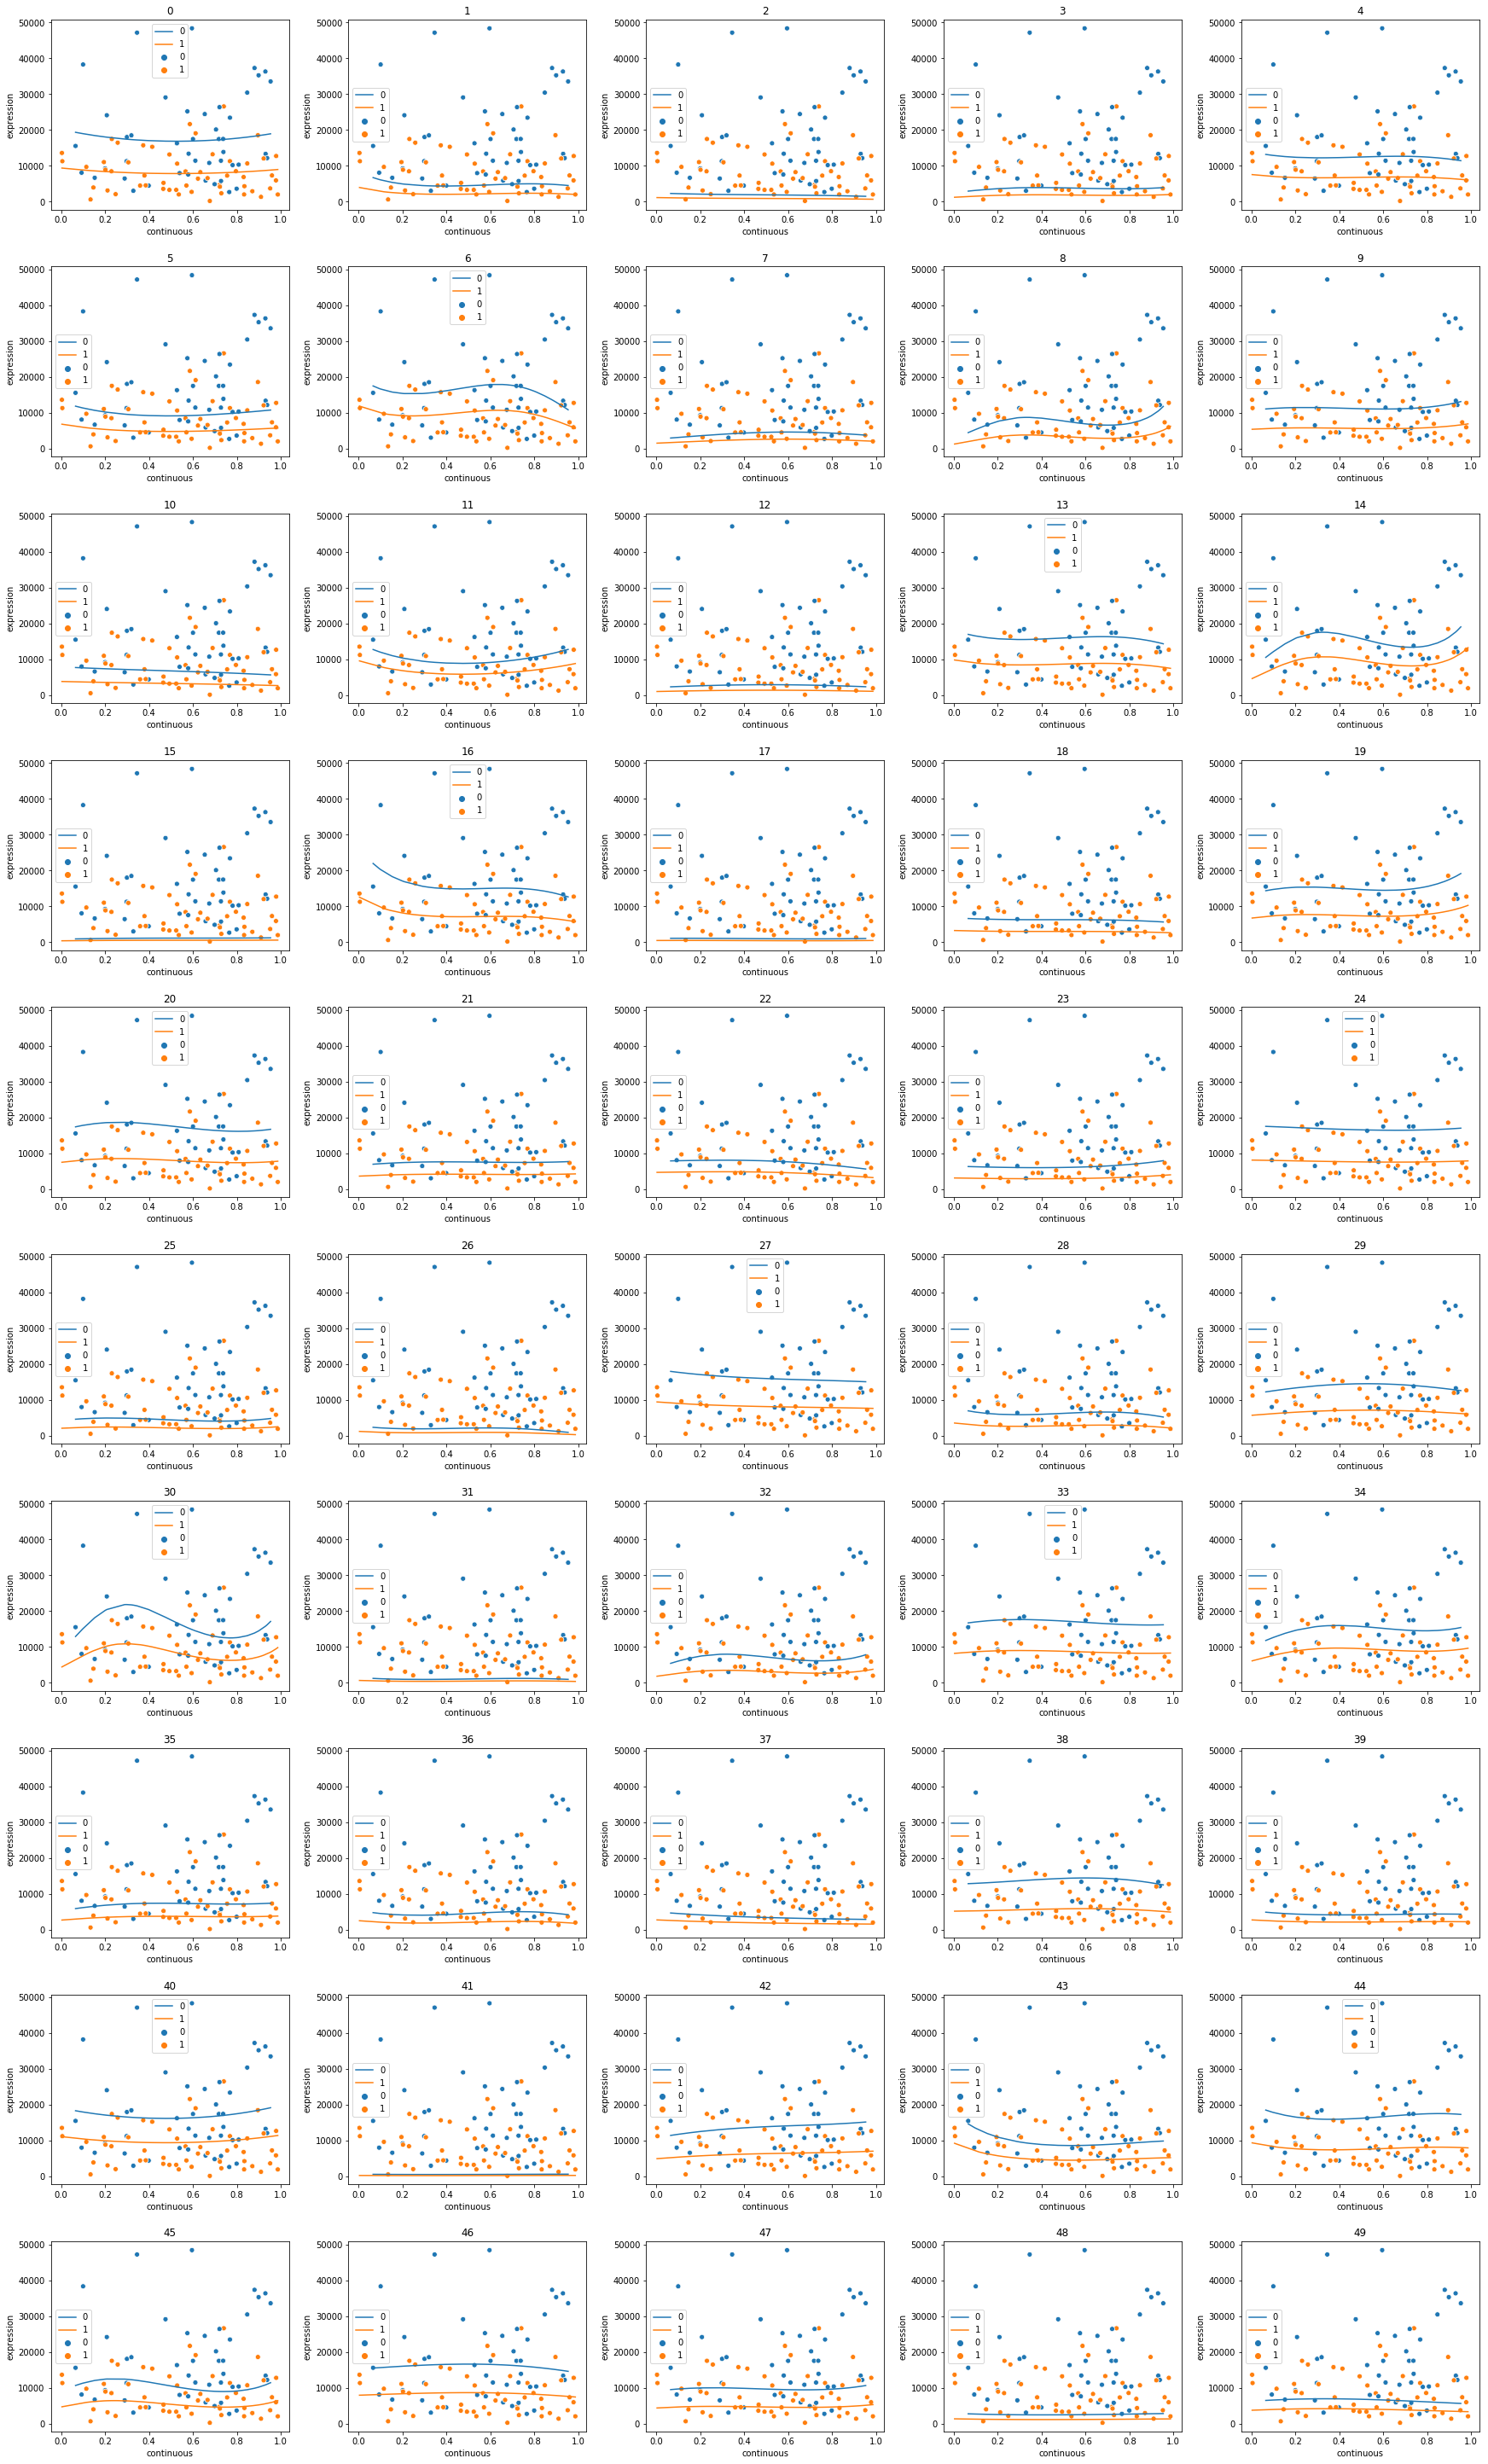

In [11]:
axs = test.plot_genes(
    genes=test.gene_ids[:50], 
    hue=random_sample_description['batch'].values,
    nonnumeric=True,
    show=True,
    ncols=5
)

Plot heatmap of all genes. This plots the models fits (essentially a smoothingk).

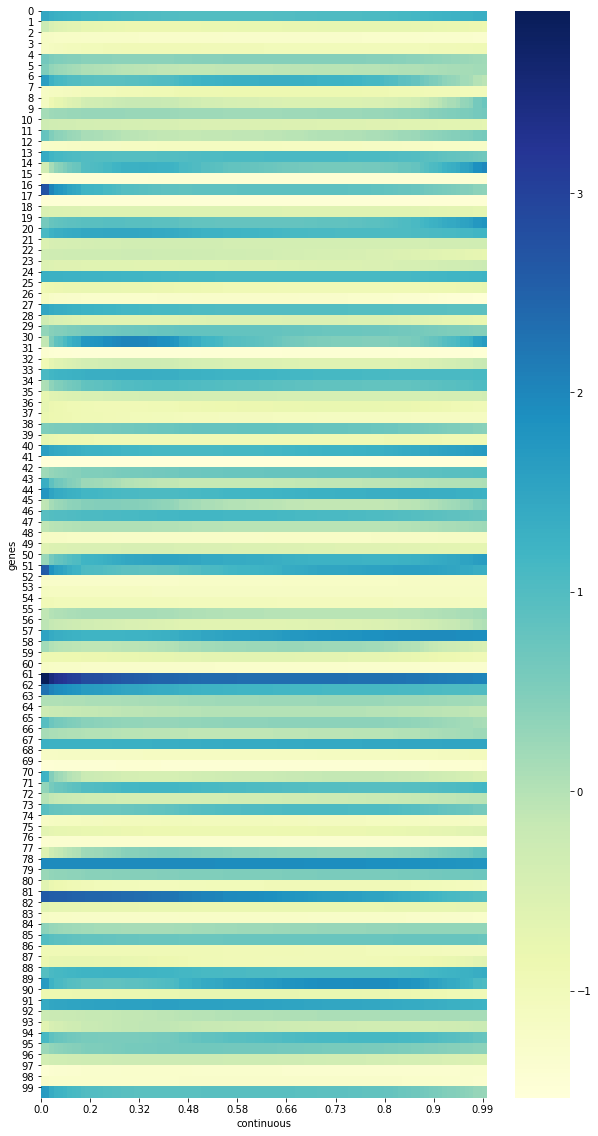

In [12]:
test.plot_heatmap(genes=test.gene_ids, transform="zscore", height_per_gene=0.2, show=True)